In [801]:
"""Initial Imports"""
import pandas as pd
import numpy as np
import re
import tweepy
import datetime
from pandas_datareader import data as web
from textblob import TextBlob
from sklearn.svm import SVR
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [802]:
consumer_key = "W8olFrRLK7Lt7BUh6YAbdSG4h"
consumer_secret = "izRdiwC73rntSdMdAQm2gL8zFNAHVLa99A8dI99w0Lz16jvNrx"

access_token = "620364433-Kj5up6bB6KLfl5wfmxxcAnWthse5o38P2MKABM00"
access_token_secret = "Faxxv0hb54KF7MmakQ8WZmvaCC5YIprcWhiOuEyQY2iLt"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

fetch_tweets=tweepy.Cursor(api.search, q="#TSLA",count=100, lang ="en",since="2019-9-25", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

data.to_csv("TeslaTweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
print("Created CSV")

Created CSV


In [803]:
##Read the data
data = pd.read_csv('tweets_data_old_elonmusk.csv')

In [804]:
cdata=pd.DataFrame(columns=['Date','Tweets'])
print(len(data))

3218


In [ ]:
##clean up the tweets
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.at[index,'Date'] =row["Date"]
    cdata.at[index,'Tweets']= my_new_string
    #index=index+1
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [739]:
#clubbed tweets date wise
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.at[indx,'Date']=get_date
        ccdata.at[indx,'Tweets']=get_tweet
        indx+=1
        get_tweet=" "

In [740]:
ccdata = pd.read_csv('Tesla_tweets_old.csv')
ccdata.head()

,Unnamed: 0,Date,Tweets
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...
1,1,9/28/2017,kevinroose Just another day in the office Fas...
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...
4,4,9/25/2017,Daimler Good Major improvements some unexpec...


In [743]:
"""Get Stock Price From Yahoo using Pandas.dataReader"""

start = datetime.datetime(2012,10,26)
## Let's get Tesla stock data; Tesla's ticker symbol is TSLA
## First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, 
##fourth is the end date
tesla = web.DataReader('TSLA', 'yahoo', start)
#tesla.to_csv('TESLA_stock_price.csv')

In [744]:
read_stock_p=pd.read_csv('TESLA_stock_price.csv')
read_stock_p.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,10/26/2012,27.799999,27.020000,27.530001,27.379999,477400,27.379999
1,10/31/2012,28.350000,27.370001,27.700001,28.129999,775200,28.129999
2,11/1/2012,29.490000,28.200001,28.250000,29.250000,1024100,29.250000
3,11/2/2012,29.549999,28.549999,29.270000,28.920000,1030300,28.920000
4,11/5/2012,31.580000,29.330000,29.799999,31.500000,2048900,31.500000


In [745]:
"""Add the stock price value matching tweets for the day"""

ccdata['Prices']=""
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]             
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.at[i,'Prices']=int(read_stock_p.Close[j])
            break

In [629]:
"""Show that there are some empty fields for days when stock Market is closed"""

'Show that there are some empty fields for days when stock Market is closed'

In [746]:
ccdata

,Unnamed: 0,Date,Tweets,polarity,Prices
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,341
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,339
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,340
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,345
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,344
5,9,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,-0.125000,
6,11,9/14/2017,High res version at httpstcoYysKftHhoz jovani...,0.187143,377
7,13,9/12/2017,RT Gizmodo Hackers have already started to we...,-0.600000,362
8,17,9/4/2017,SmileSimplify Fun exciting tweets coming soon...,0.080754,
9,18,8/31/2017,Putting together SpaceX rocket landing bloope...,0.192857,355


In [747]:
"""Filling empty price with previous day price"""
for i in range(1,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
            ccdata.Prices.iloc[i]=int(ccdata.Prices.iloc[i-1])

#ccdata['Prices'] = ccdata['Prices'].apply(np.int64)


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [748]:
ccdata 

,Unnamed: 0,Date,Tweets,polarity,Prices
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,341
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,339
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,340
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,345
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,344
5,9,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,-0.125000,344
6,11,9/14/2017,High res version at httpstcoYysKftHhoz jovani...,0.187143,377
7,13,9/12/2017,RT Gizmodo Hackers have already started to we...,-0.600000,362
8,17,9/4/2017,SmileSimplify Fun exciting tweets coming soon...,0.080754,362
9,18,8/31/2017,Putting together SpaceX rocket landing bloope...,0.192857,355


In [784]:
dataframe = ccdata[['Date','Prices']].copy()

In [785]:
dataframe["Comp"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''
dataframe

,Date,Prices,Comp,Negative,Neutral,Positive
0,9/29/2017,341,,,,
1,9/28/2017,339,,,,
2,9/27/2017,340,,,,
3,9/26/2017,345,,,,
4,9/25/2017,344,,,,
5,9/16/2017,344,,,,
6,9/14/2017,377,,,,
7,9/12/2017,362,,,,
8,9/4/2017,362,,,,
9,8/31/2017,355,,,,


In [786]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [787]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        dataframe.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        dataframe.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        dataframe.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [788]:
dataframe

,Date,Prices,Comp,Negative,Neutral,Positive
0,9/29/2017,341,0.9705,0,0.846,0.154
1,9/28/2017,339,0.8225,0,0.591,0.409
2,9/27/2017,340,0,0,1,0
3,9/26/2017,345,0.8658,0,0.599,0.401
4,9/25/2017,344,0.6369,0,0.729,0.271
5,9/16/2017,344,-0.1501,0.041,0.931,0.028
6,9/14/2017,377,0.6369,0.036,0.839,0.125
7,9/12/2017,362,0.7003,0,0.746,0.254
8,9/4/2017,362,0.775,0.078,0.815,0.107
9,8/31/2017,355,0.7861,0.044,0.855,0.101


% of positive tweets=  84.51730418943534
% of negative tweets=  15.482695810564662


[]

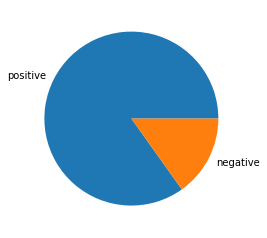

In [789]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    else:
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [790]:
test = dataframe.iloc[0:199]
train = dataframe.iloc[200:549]

In [791]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [792]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [793]:
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])

In [794]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [795]:
from sklearn import datasets
from datetime import datetime, timedelta
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['Prices'])   
prediction = regr.predict(numpy_dataframe_test)
regr.score(numpy_dataframe_train, train['Prices'])

0.00820995459821905

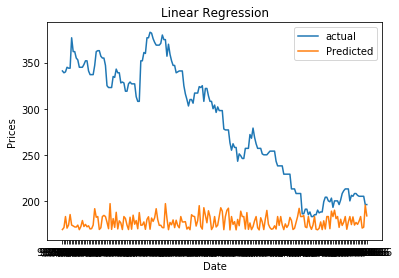

In [800]:
date_test = np.array([x[0] for x in test.to_numpy()])
plt.plot(date_test,y_test, label="actual")
plt.plot(date_test,prediction, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Prices')
plt.title('Linear Regression')
plt.legend()
plt.show()